In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

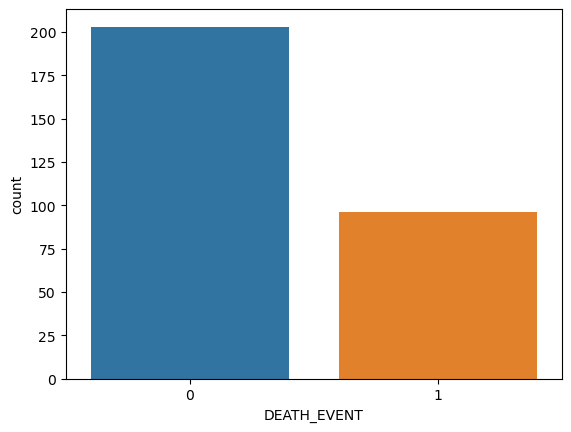

In [5]:
sns.countplot(x='DEATH_EVENT', data = df)

<Axes: xlabel='anaemia', ylabel='count'>

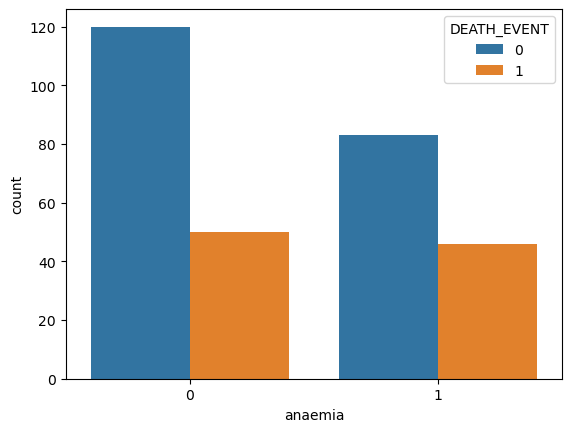

In [6]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data =df)

In [7]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<Axes: xlabel='count', ylabel='anaemia'>

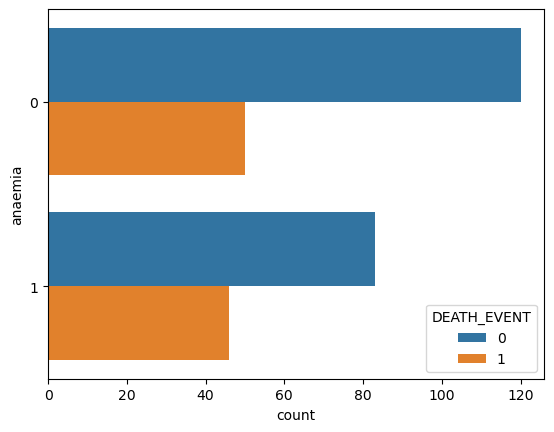

In [8]:
sns.countplot(y='anaemia',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

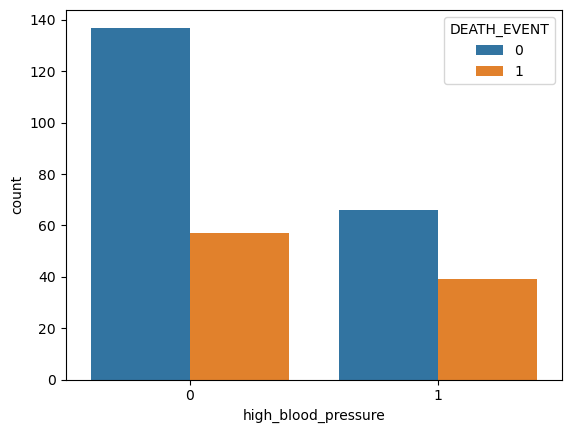

In [9]:
sns.countplot(x = 'high_blood_pressure', hue='DEATH_EVENT', data=df)

<Axes: xlabel='smoking', ylabel='count'>

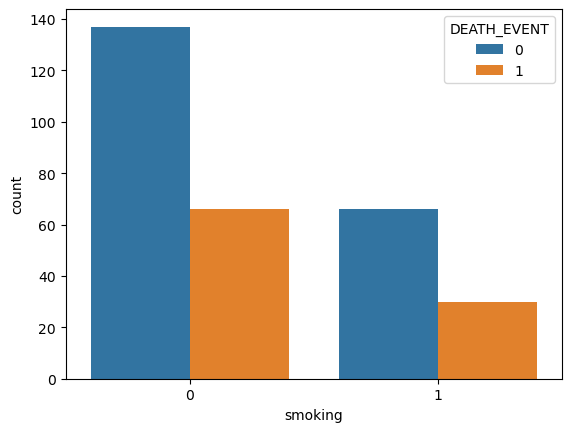

In [10]:
sns.countplot(x = 'smoking', hue='DEATH_EVENT', data=df)

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

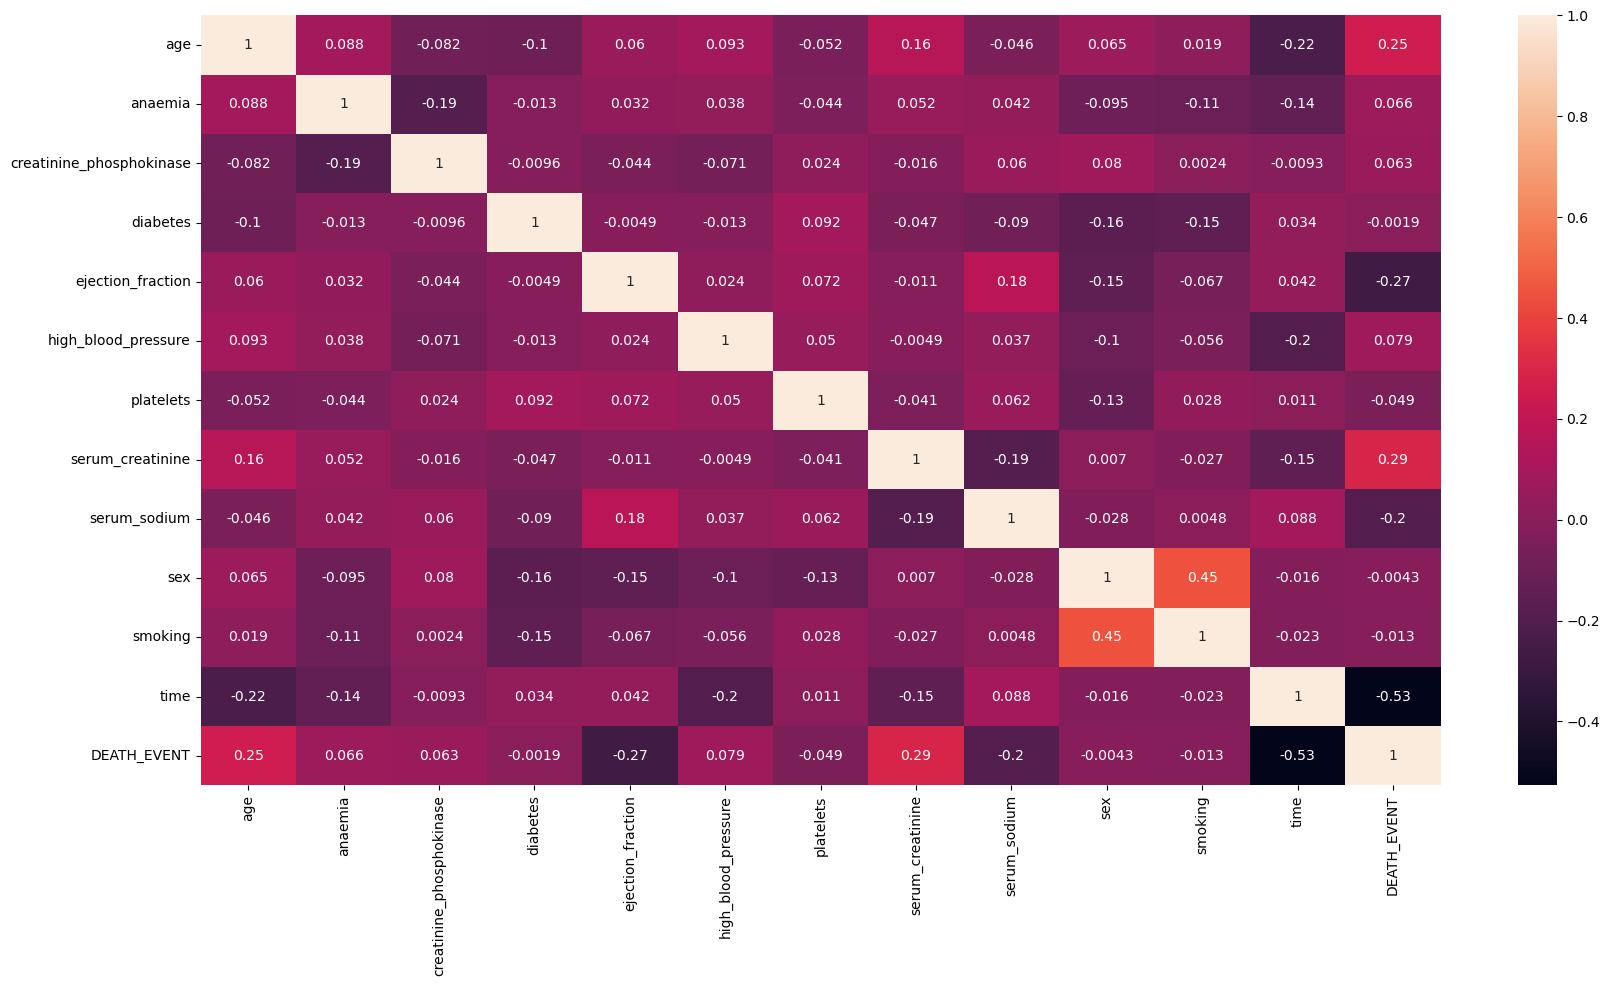

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
X= df.drop('DEATH_EVENT',axis=1)
Y= df[['DEATH_EVENT']]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.30,random_state=42)
xtrain.shape

(209, 12)

In [15]:
xtest.shape

(90, 12)

# DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Performance Score

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve #plot_roc_curve
from sklearn.metrics import RocCurveDisplay
pred = clf.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [18]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [19]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.77      0.73        53\n           1       0.61      0.51      0.56        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.65        90\nweighted avg       0.66      0.67      0.66        90\n'

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



In [21]:
confusion_matrix(ytest,pred)

array([[41, 12],
       [18, 19]], dtype=int64)

In [22]:
(41+22)/(41+12+22+15)

0.7

In [23]:
accuracy_score(ytest,pred)

0.6666666666666666

In [24]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)
print(" tp = " , tp)
print(" fn = " , fn)
print(" fp = " , fp)
print(" tn = " , tn)

 tp =  41
 fn =  12
 fp =  18
 tn =  19


# Accuracy

In [25]:
acc = (tp+tn)/(tp+fn+fp+tn)
acc

0.6666666666666666

# Plot ROC curve

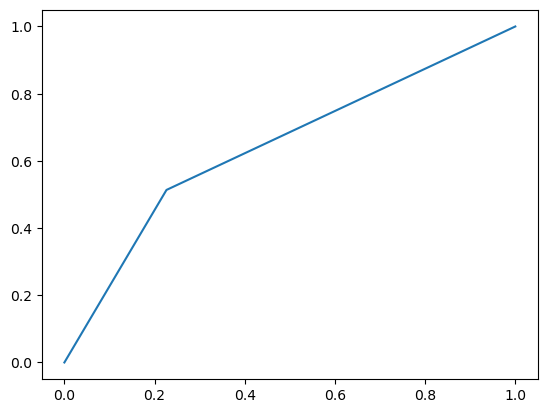

In [28]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
#plot_roc_curve(clf,xtest,ytest, color='orange')

y_pred = clf.predict_proba(xtest)[:, 1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = metrics.roc_auc_score(ytest, y_pred)
plt.plot(fpr,tpr,label="clf, AUC="+str(auc))
plt.show()

In [27]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, xtest , ytest, color='orange')

NameError: name 'plot_roc_curve' is not defined

In [ ]:
plot_roc_curve(clf, xtest , ytest, color='orange')
plt.plot([0,1],[0,1])

# Tree

[Text(0.4605263157894737, 0.95, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.22807017543859648, 0.85, 'ejection_fraction <= 72.5\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.19298245614035087, 0.75, 'creatinine_phosphokinase <= 109.5\ngini = 0.223\nsamples = 47\nvalue = [6, 41]'),
 Text(0.07017543859649122, 0.65, 'time <= 24.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.03508771929824561, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.10526315789473684, 0.55, 'creatinine_phosphokinase <= 101.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.07017543859649122, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.14035087719298245, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.65, 'creatinine_phosphokinase <= 1818.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.24561403508771928, 0.55, 'ejection_fraction <= 47.5\ngini = 0.061\nsamples = 32\nvalue = [1, 31]'),
 Text(0.21052631

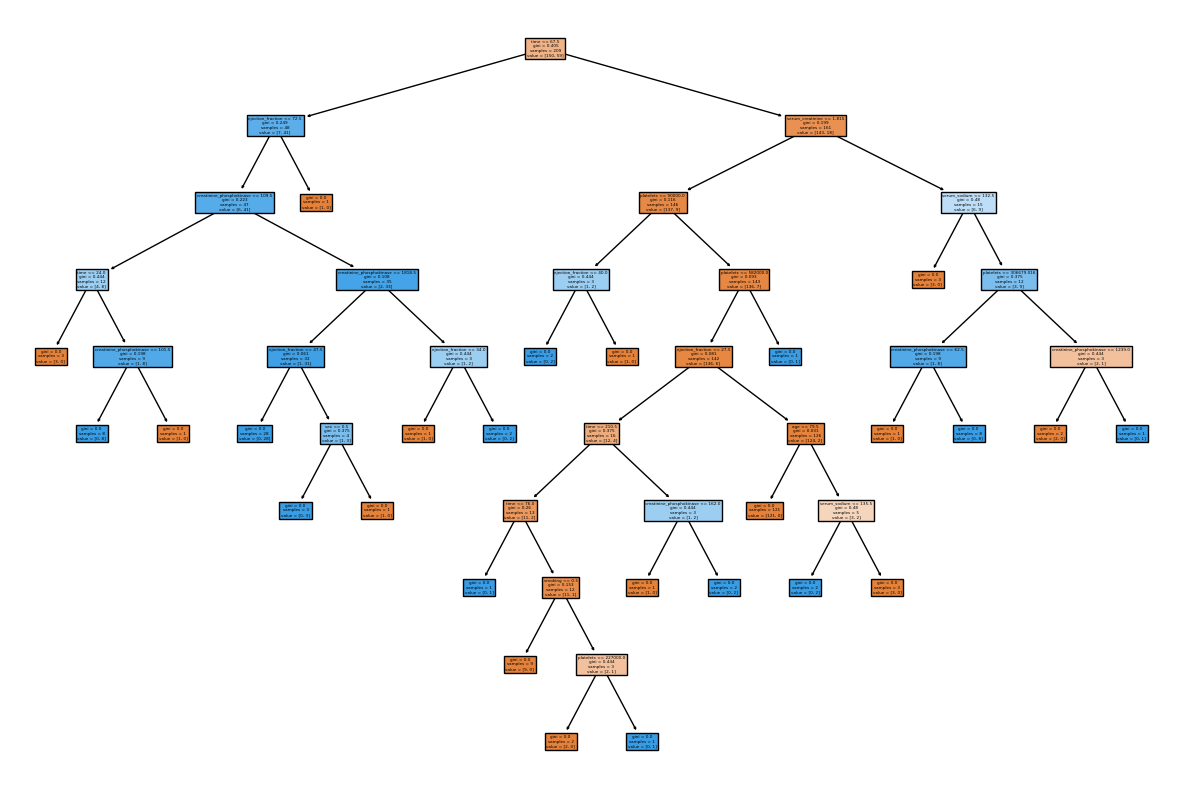

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True, feature_names = X.columns)

# Cost complexity With Post Pruning

In [30]:
pruning_path = clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier 
ccp_alpha_values = pruning_path.ccp_alphas

In [31]:
ccp_alpha_values

array([0.        , 0.00438596, 0.00451128, 0.00637959, 0.00637959,
       0.00637959, 0.00677831, 0.00757576, 0.00850611, 0.00874962,
       0.01022189, 0.01072915, 0.01291866, 0.03772605, 0.19500242])

In [32]:
clfs_list = [] #save different classifiers

for x in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=x)
    clf.fit(xtrain,ytrain)
    clfs_list.append(clf)
    

In [33]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004385964912280702, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00451127819548872, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006778309409888357, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.007575757575757576, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008506113769271663, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008749623582159468, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01022189311662996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010729149812849129, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012918660287081336, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03772604938085644, random_state=42),

# Compare

In [34]:
train_scores = [clf.score(xtrain,ytrain) for clf in clfs_list]
test_scores  = [clf.score(xtest,ytest) for clf in clfs_list]

train_scores

[1.0,
 0.9952153110047847,
 0.9856459330143541,
 0.9712918660287081,
 0.9712918660287081,
 0.9712918660287081,
 0.9617224880382775,
 0.9521531100478469,
 0.9473684210526315,
 0.9330143540669856,
 0.9138755980861244,
 0.9090909090909091,
 0.8947368421052632,
 0.8803827751196173,
 0.7177033492822966]

In [35]:
test_scores

[0.6777777777777778,
 0.6777777777777778,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6777777777777778,
 0.6666666666666666,
 0.6666666666666666,
 0.7,
 0.7222222222222222,
 0.7333333333333333,
 0.7444444444444445,
 0.7666666666666667,
 0.5888888888888889]

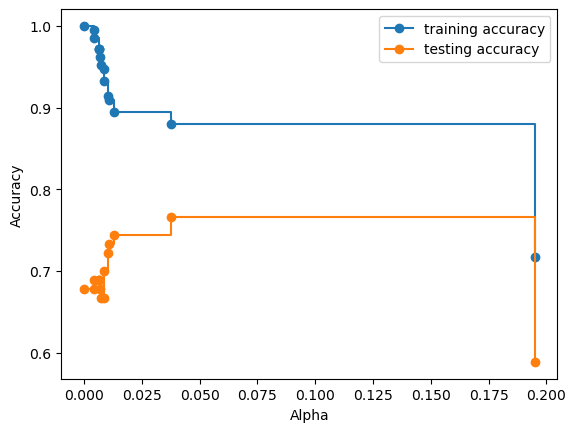

In [36]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values,train_scores,marker='o',label="training accuracy",drawstyle="steps-post")
ax.plot(ccp_alpha_values,test_scores,marker='o',label="testing accuracy",drawstyle="steps-post")
ax.legend()

In [37]:
clf = DecisionTreeClassifier(random_state=42,ccp_alpha=.070)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
accuracy_score(ytest,pred)

0.7666666666666667

[Text(0.5, 0.75, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.25, 0.25, 'gini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.75, 0.25, 'gini = 0.199\nsamples = 161\nvalue = [143, 18]')]

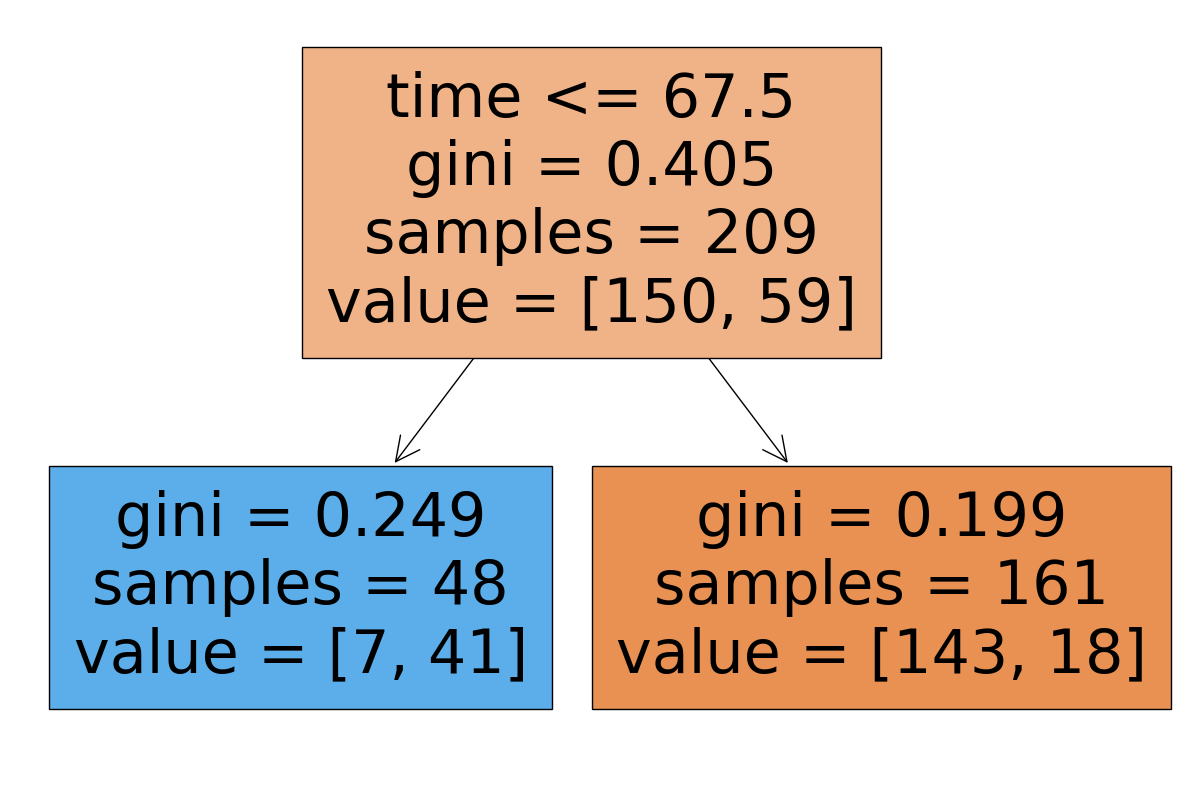

In [38]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names=X.columns)